<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Stacked Charts**


Estimated time needed: **45** minutes


In this lab, you will focus on visualizing data specifically using stacked charts. You will use SQL queries to extract the necessary data and apply stacked charts to analyze the composition and comparison within the data.


## Objectives


In this lab, you will perform the following:


- Visualize the composition of data using stacked charts.

- Compare multiple variables across different categories using stacked charts.

- Analyze trends within stacked chart visualizations.


## Setup: Downloading and Loading the Data
**Install the libraries**


In [9]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 167.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 168.4 MB/s eta 0:00:00


In [10]:
!pip install matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 175.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 119.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 91.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 159.2 MB/s eta 0:00:00


**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



### Step 1: Download the dataset


In [11]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2026-01-15 19:12:34--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  58.8MB/s    in 2.6s    

2026-01-15 19:12:37 (58.8 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



### Step 2: Import necessary libraries and load the dataset


In [12]:
import pandas as pd
import matplotlib.pyplot as plt

### Load the data


In [13]:
df = pd.read_csv("survey-data.csv")

### Display the first few rows of the data to understand its structure


In [14]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Stacked Chart for Composition of Job Satisfaction Across Age Groups


##### 1. Stacked Chart of Median `JobSatPoints_6` and `JobSatPoints_7` for Different Age Groups


Visualize the composition of job satisfaction scores (`JobSatPoints_6` and `JobSatPoints_7`) across various age groups. This will help in understanding the breakdown of satisfaction levels across different demographics.



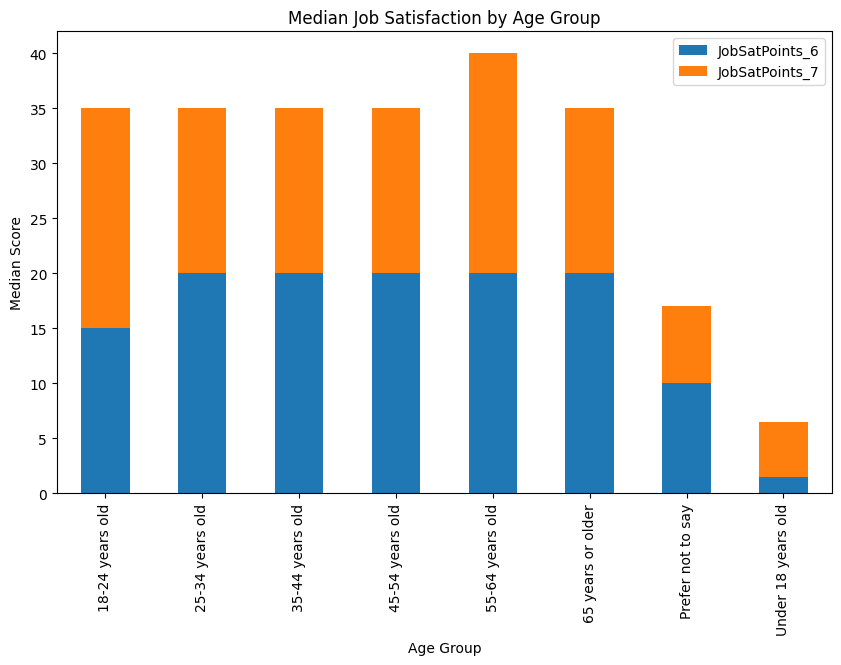

In [15]:
job_sat_by_age = df.groupby('Age')[['JobSatPoints_6', 'JobSatPoints_7']].median()

job_sat_by_age.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Median Job Satisfaction by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Score')
plt.show()


##### Stacked Chart of `JobSatPoints_6` and `JobSatPoints_7` for Employment Status


Create a stacked chart to compare job satisfaction (`JobSatPoints_6` and `JobSatPoints_7`) across different employment statuses. This will show how satisfaction varies by employment type.


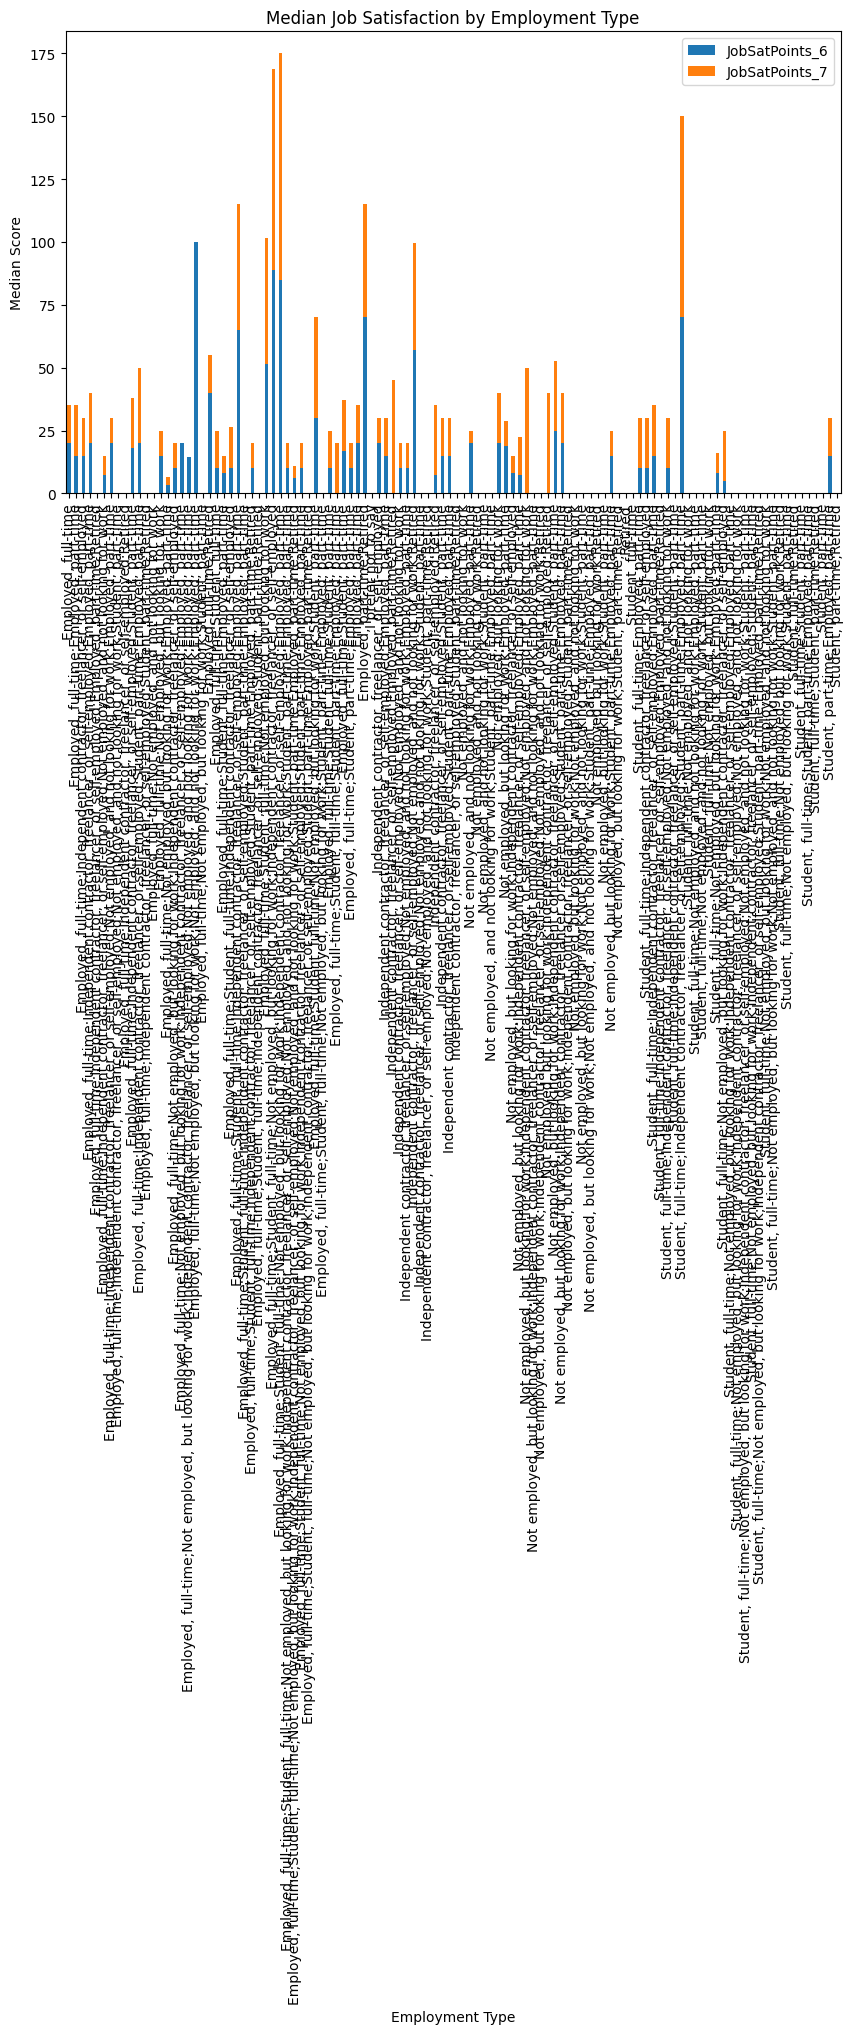

In [16]:
job_sat_by_emp = df.groupby('Employment')[['JobSatPoints_6', 'JobSatPoints_7']].median()

job_sat_by_emp.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Median Job Satisfaction by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Median Score')
plt.show()


### Task 2: Stacked Chart for Compensation and Job Satisfaction by Age Group


##### This stacked chart visualizes the composition of compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) specifically for respondents aged 30-35.


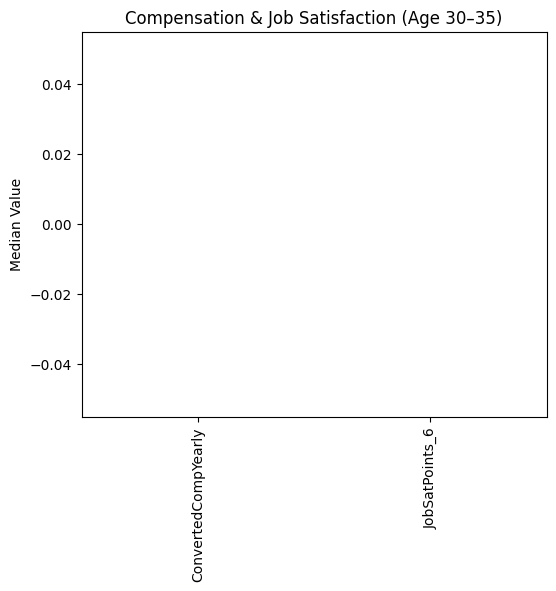

In [17]:
age_30_35 = df[df['Age'] == '30-35']
comp_sat = age_30_35[['ConvertedCompYearly', 'JobSatPoints_6']].median()

comp_sat.plot(kind='bar', stacked=True, figsize=(6,5))
plt.title('Compensation & Job Satisfaction (Age 30–35)')
plt.ylabel('Median Value')
plt.show()


##### Stacked Chart of Median Compensation and Job Satisfaction Across Age Group


Compare the median compensation and job satisfaction metrics across different age groups. This helps visualize how compensation and satisfaction levels differ by age.


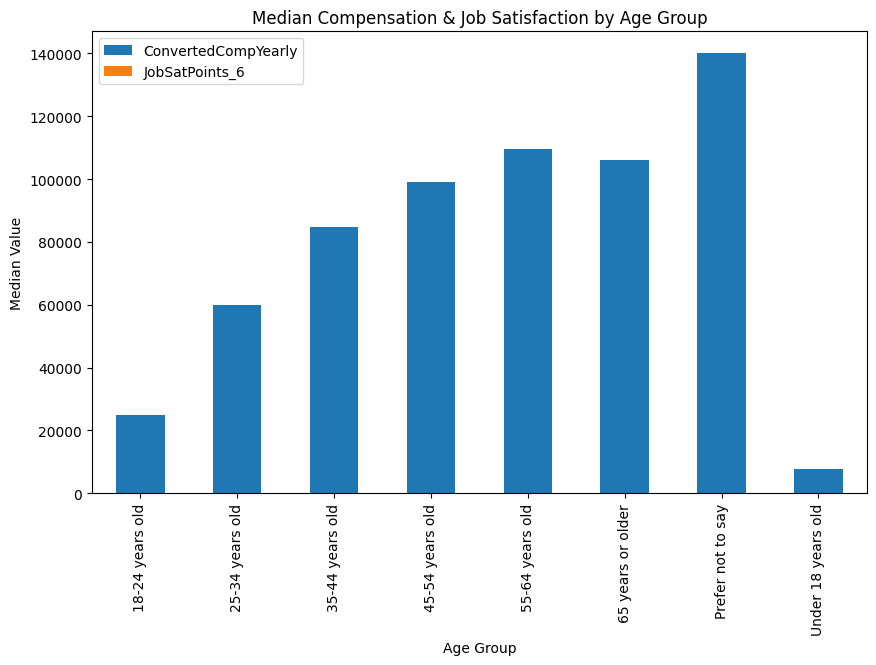

In [18]:
comp_sat_by_age = df.groupby('Age')[['ConvertedCompYearly', 'JobSatPoints_6']].median()

comp_sat_by_age.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Median Compensation & Job Satisfaction by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Value')
plt.show()


### Task 3: Comparing Data Using Stacked Charts


##### 1. Stacked Chart of Preferred Databases by Age Group




Visualize the top databases that respondents from different age groups wish to learn. Create a stacked chart to show the proportion of each database in each age group.


Database-related columns found:
['DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired']

Using database column: DatabaseWantToWorkWith


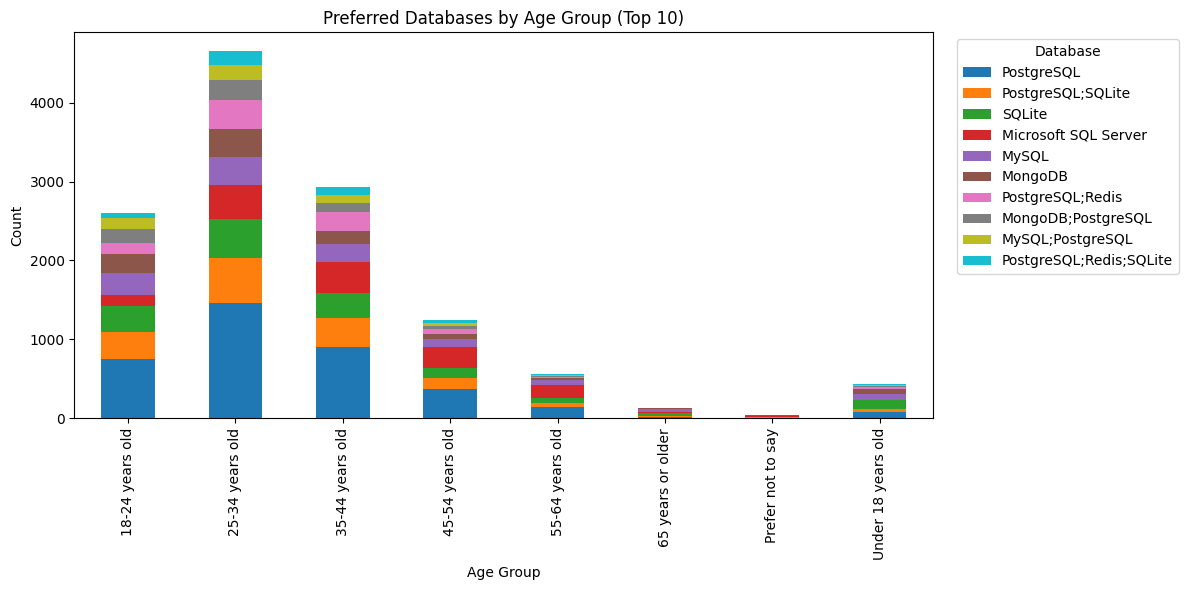

In [19]:
# 1) Find the database-related column in your dataset
db_candidates = [c for c in df.columns if "Database" in c]

print("Database-related columns found:")
print(db_candidates)

# Pick the best match automatically (prefer "Want" or "WorkWith" etc.)
preferred_order = ["Want", "Desire", "WorkWith", "Admired", "NextYear", "HaveWorkedWith"]
db_col = None

for key in preferred_order:
    for c in db_candidates:
        if key.lower() in c.lower():
            db_col = c
            break
    if db_col:
        break

# If nothing matched the preferred keywords, just take the first Database column
if db_col is None and len(db_candidates) > 0:
    db_col = db_candidates[0]

if db_col is None:
    raise ValueError("No database-related column found in df.columns.")

print(f"\nUsing database column: {db_col}")

# 2) Build stacked counts by Age x Database column
db_by_age = df.groupby(['Age', db_col]).size().unstack(fill_value=0)

# (Optional) Keep only top 10 databases overall so the chart is readable
top_n = 10
top_dbs = db_by_age.sum(axis=0).sort_values(ascending=False).head(top_n).index
db_by_age_top = db_by_age[top_dbs]

# 3) Plot
db_by_age_top.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title(f'Preferred Databases by Age Group (Top {top_n})')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Database', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()


##### 2. Stacked Chart of Employment Type by Job Satisfaction


Analyze the distribution of employment types within each job satisfaction level using a stacked chart. This will provide insights into how employment types are distributed across various satisfaction ratings.


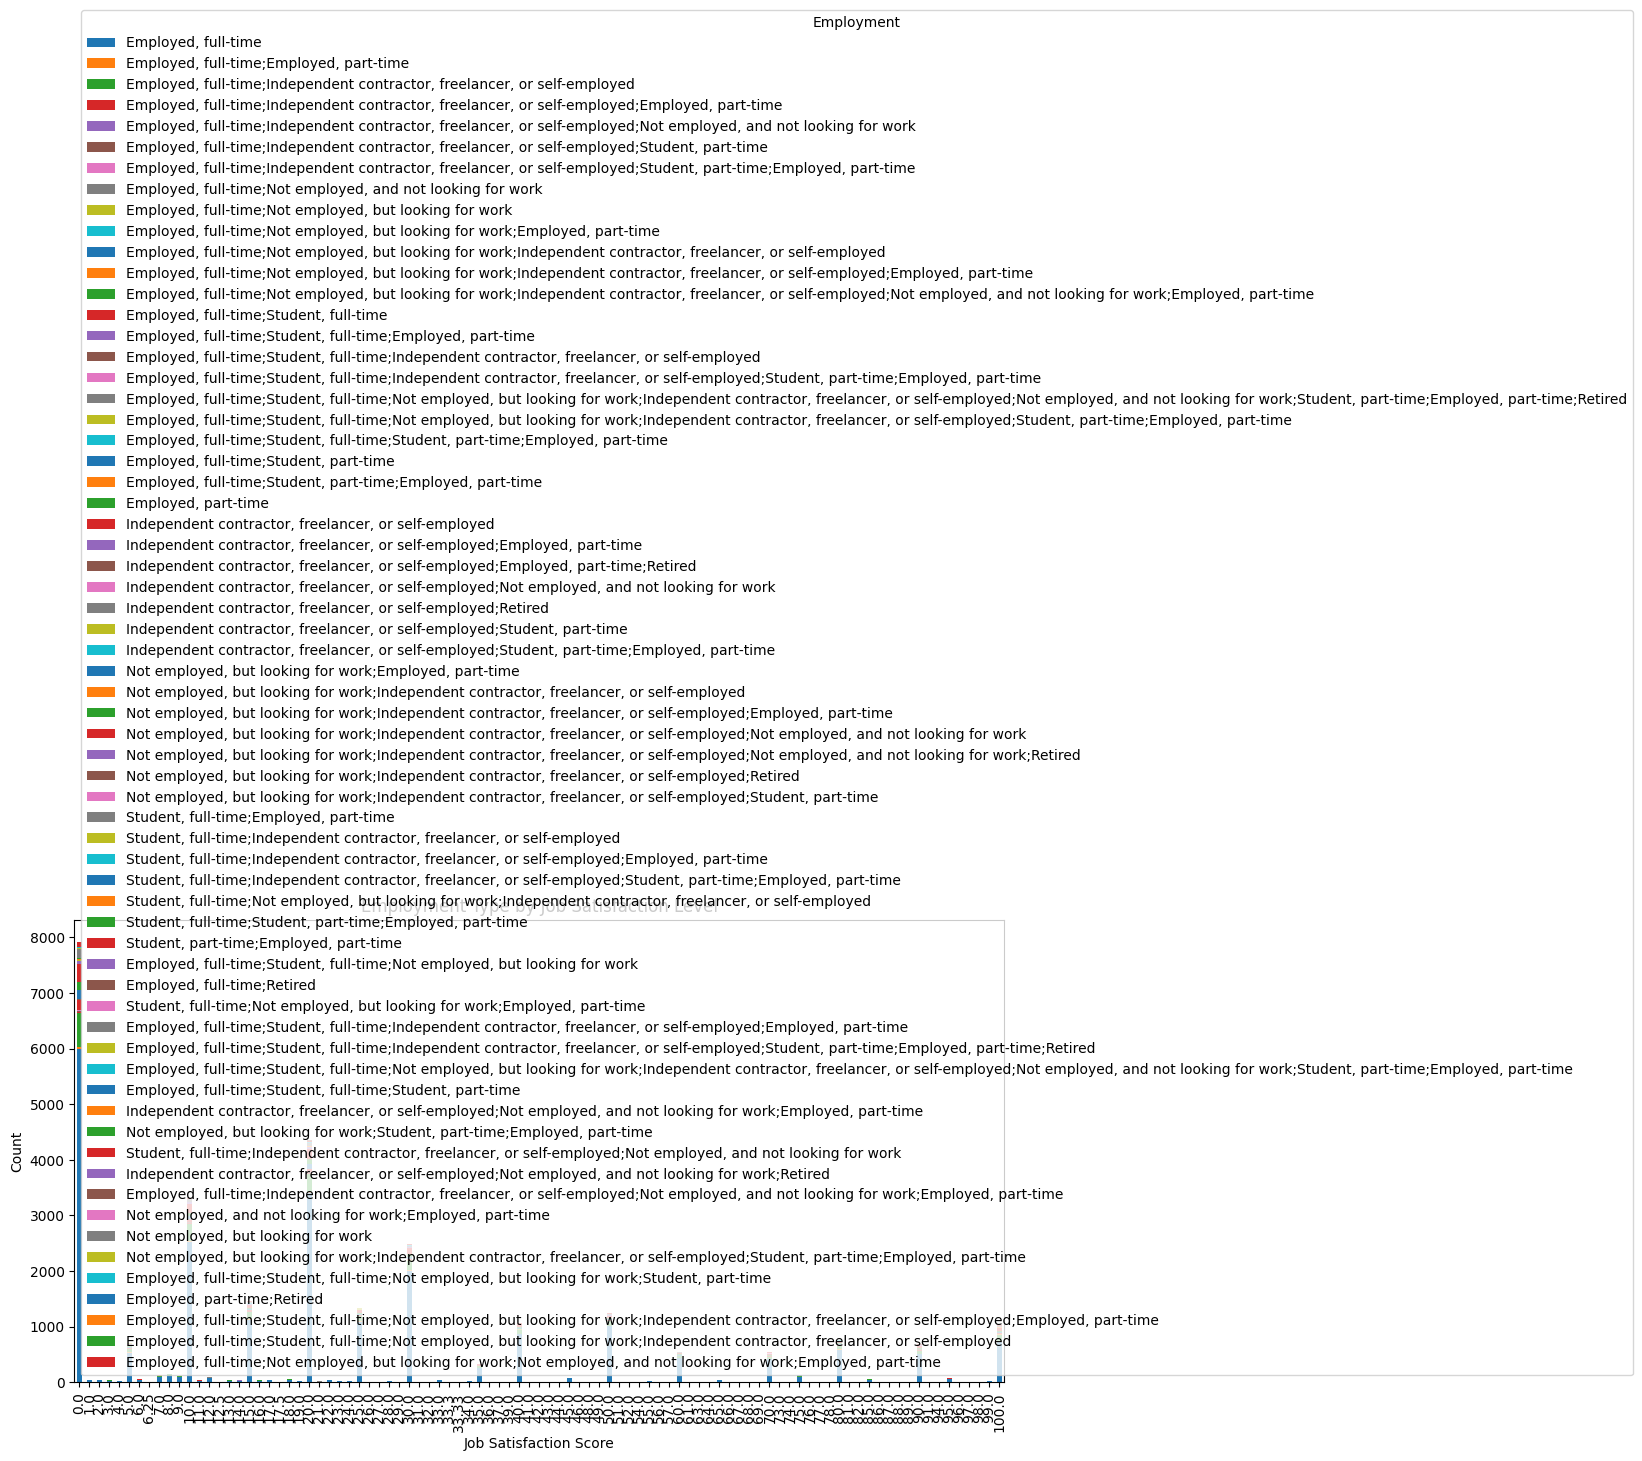

In [20]:
emp_by_jobsat = df.groupby(['JobSatPoints_6', 'Employment']).size().unstack(fill_value=0)

emp_by_jobsat.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Employment Type by Job Satisfaction Level')
plt.xlabel('Job Satisfaction Score')
plt.ylabel('Count')
plt.show()


### Task 4: Exploring Technology Preferences Using Stacked Charts


##### 1. Stacked Chart for Preferred Programming Languages by Age Group


Analyze how programming language preferences (`LanguageAdmired`) vary across age groups.


In [ ]:
lang_by_age = df.groupby(['Age', 'LanguageAdmired']).size().unstack(fill_value=0)

lang_by_age.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Programming Languages Admired by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()


##### 2. Stacked Chart for Technology Adoption by Employment Type


Explore how admired platforms (`PlatformAdmired`) differ across employment types (e.g., full-time, freelance)


In [ ]:
platform_by_emp = df.groupby(['Employment', 'PlatformAdmired']).size().unstack(fill_value=0)

platform_by_emp.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Platform Admired by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Count')
plt.show()


### Final Step: Review


In this lab, you focused on using stacked charts to understand the composition and comparison within the dataset. Stacked charts provided insights into job satisfaction, compensation, and preferred databases across age groups and employment types.


## Summary


After completing this lab, you will be able to:

- Use stacked charts to analyze the composition of data across categories, such as job satisfaction and compensation by age group.

- Compare data across different dimensions using stacked charts, enhancing your ability to communicate complex relationships in the data.

- Visualize distributions across multiple categories, such as employment type by satisfaction, to gain a deeper understanding of patterns within the dataset.


## Author:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
